In [3]:
import pandas as pd

fonte = "sample_dados/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [5]:
dados.shape

(127380, 136)

In [6]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [8]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [9]:
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [10]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [11]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

In [12]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [13]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [17]:
[dados["NU_IDADE"].min(), dados["NU_IDADE"].max()]

[13, 82]

In [18]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

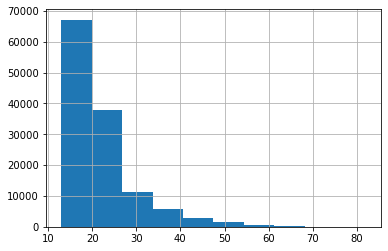

In [45]:
 dados["NU_IDADE"].hist()

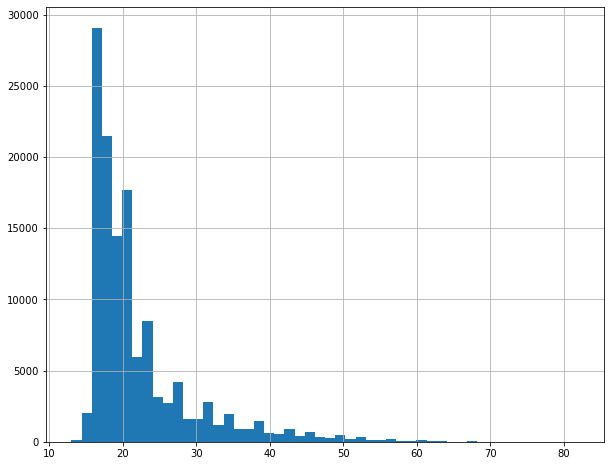

In [50]:
 dados["NU_IDADE"].hist(bins = 50, figsize = (10,8))

In [51]:
dados.query("IN_TREINEIRO == 1")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,...,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,...,A,A,A,B,A,A,D,A,A,B
16,190001005202,2019,1502301,Capitão Poço,15,PA,17,F,1,3,...,B,A,A,B,B,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127328,190006117441,2019,3126752,Franciscópolis,31,MG,16,M,3,3,...,A,A,A,B,A,A,D,A,A,B
127340,190006117776,2019,4305108,Caxias do Sul,43,RS,17,F,1,1,...,B,A,B,A,A,A,C,A,C,B
127349,190006118483,2019,2511301,Piancó,25,PB,15,F,1,1,...,A,A,A,B,A,A,B,A,A,A
127350,190006118551,2019,2611606,Recife,26,PE,16,M,1,1,...,B,A,B,E,B,B,E,B,B,B


In [59]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

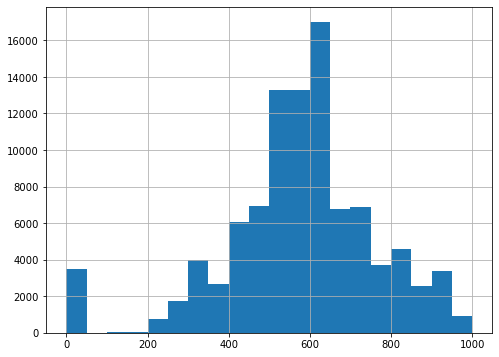

In [61]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize = (8, 6))

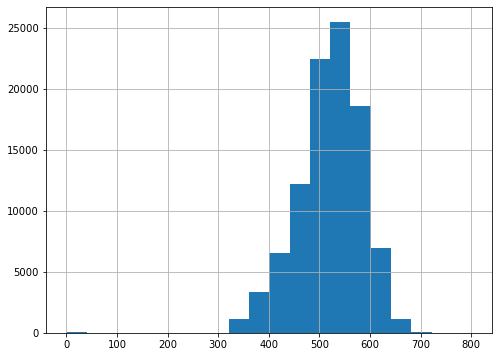

In [62]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize = (8, 6))

In [63]:
dados["NU_NOTA_REDACAO"].mean() # média

571.5700253970197

In [64]:
dados["NU_NOTA_REDACAO"].std() # Desvio padrão

188.07645455749753

In [65]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [66]:
dados[provas].quantile(0.9) #10% das notas nas provas

NU_NOTA_CN         582.2
NU_NOTA_CH         610.6
NU_NOTA_MT         680.8
NU_NOTA_LC         596.3
NU_NOTA_REDACAO    800.0
Name: 0.9, dtype: float64

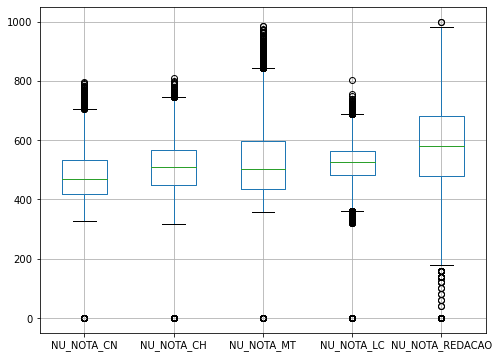

In [70]:
dados[provas].plot.box(grid = True, figsize = (8,6))

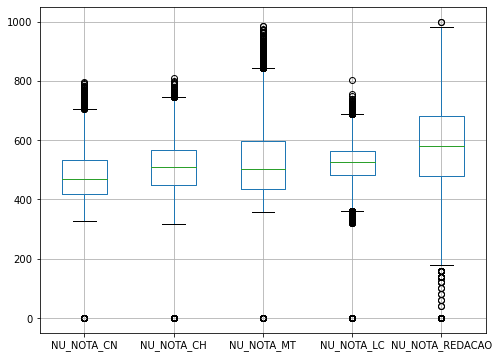

In [71]:
dados[provas].boxplot(grid = True, figsize = (8,6))

# Desafios:

### 01 - Qual a proporção de pessoas por idade no total de minha amostra?

In [120]:
pessoas_por_estado = dados["SG_UF_RESIDENCIA"].value_counts()
total = int(dados.shape[0])

distribuicao_por_estado = (pessoas_por_estado / total)*100
distribuicao_por_estado

SP    15.908306
MG    10.635108
BA     7.881928
RJ     6.647040
CE     5.794473
PA     5.628827
PE     5.449050
MA     4.351547
RS     4.291098
PR     4.128592
GO     3.350604
PB     2.896844
PI     2.381850
RN     2.322971
AM     2.213848
SC     2.098446
ES     2.001884
DF     1.890407
AL     1.776574
MT     1.750667
SE     1.424870
MS     1.299262
RO     1.099074
TO     0.924792
AP     0.821950
AC     0.742660
RR     0.287329
Name: SG_UF_RESIDENCIA, dtype: float64

In [134]:
pessoas_por_idade = dados["NU_IDADE"].value_counts()
total = int(dados.shape[0])

distribuicao_por_idade = (pessoas_por_idade / total)*100
distribuicao_por_idade

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

### 02 - Descobrir de quais estados são os inscritos com 13 anos.

In [52]:
desafio_2 = dados[["SG_UF_RESIDENCIA","NU_IDADE"]]
desafio_2.query("NU_IDADE == 13")

,SG_UF_RESIDENCIA,NU_IDADE
57359,SP,13
95630,MT,13
98197,AP,13
116501,BA,13


In [55]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

### 03 - Adicionar título no gráfico.

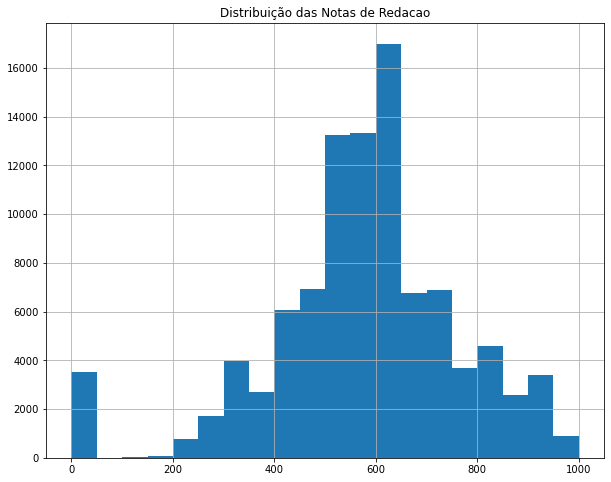

In [150]:
import matplotlib.pyplot as plt
dados['NU_NOTA_REDACAO'].hist(bins = 20, figsize = (10, 8))
plt.title('Distribuição das Notas de Redacao')
plt.show()

### 04 - Plotar os histogramas das idades dos treineiros e não treineiros.

### 05 - Comparar as distribuições (hist ou boxplot) das notas de inglês e espanhol.

### 06 - explorar bibliotecas matplotlib.